In [1]:
%pip install httpx
%pip install pandas
%pip install scipy
%pip install matplotlib
%pip install tables
%pip install scikit-learn



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import io
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.lines as mlines
from scipy.spatial import transform as scipy_transform
from datetime import datetime

In [3]:
import os
os.environ['CLICKHOUSE_USER']= 'backend'
os.environ ['CLICKHOUSE_PASSWORD']='rB0jh2YjzNOaB7'
link = 'http://api.sensorehab.com:8123'
os.environ ['CLICKHOUSE_URL']=link
import httpx


class Clickhouse:
    credentials = {
        "user": os.environ['CLICKHOUSE_USER'],
        "password": os.environ['CLICKHOUSE_PASSWORD'],
    }
    url = os.environ['CLICKHOUSE_URL']

    def __init__(self):
        self._httpx_client = httpx.Client()

    def post(
        self,
        query: str,
        headers: dict = None,
        content: bytes = None,
    ) -> str:
        response = self._httpx_client.post(
            url=self.url,
            params={
                "query": query,
                **self.credentials,
            },
            headers=headers,
            content=content,
        )
        return response.text

    def get(
        self,
        query: str,
        headers: dict = None,
    ) -> str:
        response = self._httpx_client.get(
            url=self.url,
            params={
                "query": query,
                **self.credentials,
            },
            headers=headers,
        )
        return response.text


In [6]:
df = None
df = pd.read_hdf('.\data\dataset_gross_prod.h5')
print ('HI')

HI


In [7]:
df.head(30000)

,game_result_id,game_id,patient_id,exercise_id,timestamp,src,side,h_rssi,h_gain,g_rssi,...,shoulder_quat_z,shoulder_quat_w,shoulder_lia_x,shoulder_lia_y,shoulder_lia_z,shoulder_grv_x,shoulder_grv_y,shoulder_grv_z,shoulder_tilt,position_type
0,13280,12,552,8,1992-03-06 08:24:07,00:00:00:00:00:00,1,0,0,0,...,0.400229,0.860529,0.015,0.133,0.020,-7.631,-3.575,-5.064,0.0,0
1,13280,12,552,8,1992-03-06 08:24:24,00:00:00:00:00:00,1,0,0,0,...,0.400130,0.860540,0.070,0.080,0.133,-7.766,-3.594,-5.064,0.0,0
2,13280,12,552,8,1992-03-06 08:24:40,00:00:00:00:00:00,1,0,0,0,...,0.400130,0.860540,0.068,0.078,0.133,-7.766,-3.594,-5.064,0.0,0
3,13280,12,552,8,1992-03-06 08:24:57,00:00:00:00:00:00,1,0,0,0,...,0.399990,0.860579,0.082,0.088,0.078,-7.726,-3.555,-5.045,0.0,0
4,13280,12,552,8,1992-03-06 08:25:14,00:00:00:00:00:00,1,0,0,0,...,0.400112,0.860555,0.073,0.114,0.143,-7.763,-3.575,-5.102,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,13237,12,588,7,1991-11-03 12:51:30,00:00:00:00:00:00,1,0,0,0,...,0.243796,0.421466,-0.029,-0.141,-0.032,-5.664,1.141,-7.889,0.0,0
29996,13237,12,588,7,1991-11-03 12:51:47,00:00:00:00:00:00,1,0,0,0,...,0.244043,0.421474,0.013,-0.239,0.014,-5.626,1.217,-7.965,0.0,0
29997,13237,12,588,7,1991-11-03 12:52:04,00:00:00:00:00:00,1,0,0,0,...,0.244043,0.421474,0.017,-0.236,0.014,-5.626,1.217,-7.965,0.0,0
29998,13237,12,588,7,1991-11-03 12:52:21,00:00:00:00:00:00,1,0,0,0,...,0.244470,0.421473,-0.020,-0.201,-0.064,-5.626,1.198,-7.871,0.0,0


In [8]:
def calc_ang_to_Y(row):
    w, x, y, z = row.to_list()
    rotation = scipy_transform.Rotation.from_quat([x, y, z, w])
    vec = rotation.apply([0, 1, 0])
    rad_angle = np.arcsin(vec[2])
    deg_angle = math.degrees(rad_angle)
    return -deg_angle

In [9]:
forearm_quat = [
    'forearm_quat_x', 
    'forearm_quat_y', 
    'forearm_quat_z', 
    'forearm_quat_w',
]
df['forearm_y_ang'] = df[forearm_quat].apply(calc_ang_to_Y, axis=1)
df['forearm_y_ang'].head(5)

0    13.299940
1    13.299197
2    13.353996
3    13.380752
4    13.395770
Name: forearm_y_ang, dtype: float64

In [10]:
#Добавление элемента в массив маркеров
def add_sorted_marker_position(mark_locs, position):
    if not mark_locs:
        mark_locs.append(position)
    else:
        index = 0
        while index < len(mark_locs) and mark_locs[index] < position:
            index += 1
        mark_locs.insert(index, position)
    return mark_locs

In [11]:
#Удаление элемента из массива маркеров
def remove_marker_by_index(start_mark_locs, index):
    del start_mark_locs[index]
    return start_mark_locs

In [104]:
def plot_game_result(result_id, patient_id, frame_range=(0,-1)):
    defprops = {
        'xdata': [],
        'ydata': [],
        'linestyle': 'None',
        'markersize': 10
    }
    black_arrow = mlines.Line2D(
        **defprops,
        marker='^',
        color='black',
        label='start position',
    )
    red_arrow = mlines.Line2D(
        **defprops,
        marker='v',
        color='red',
        label='end position',
    )
    plt.legend(handles=[black_arrow, red_arrow])

    result_df = df.loc[df['game_result_id'] == result_id].reset_index(drop=True)
    
    assert len(exercise_ids := result_df['exercise_id'].unique()) == 1
    #assert len(game_ids := result_df['game_id'].unique()) == 1

    exercise_id = exercise_ids[0]


    # 'ArrowDown' positionType = 1;
    start_mark_locs = result_df.loc[result_df['position_type'] == 1].index
    # 'ArrowUp' positionType = 2;
    end_mark_locs = result_df.loc[result_df['position_type'] == 2].index    
    if frame_range:
        
        start_mark_locs = [i - frame_range[0] for i in start_mark_locs]
        #start_mark_locs = remove_marker_by_index(start_mark_locs, 2)
        end_mark_locs = [i - frame_range[0] for i in end_mark_locs]
        #end_mark_locs = remove_marker_by_index(end_mark_locs, 10)
    result_df['forearm_y_ang'].plot(
        title= f'patient {patient_id}, result {result_id}, exercise {exercise_id}',
        figsize=(25, 6),
        color='tab:blue',
        marker='^',
        markersize=10,
        markerfacecolor='black',
        markevery=start_mark_locs,
    )
    ax = result_df['forearm_y_ang'].plot(
        figsize=(25, 6),
        color='tab:blue',
        marker='v',
        markersize=10,
        markerfacecolor='red',
        markevery=end_mark_locs,

    )


    #start_mark_locs = add_sorted_marker_position(start_mark_locs, 650)
    tick_range_x = range(0, 22000, 1000)
    plt.xticks(tick_range_x)
    new_figure=True
    if new_figure:
        plt.figure()

###################
#ИЗМЕНЕННЫЙ ГРАФИК#
###################

    defprops = {
        'xdata': [],
        'ydata': [],
        'linestyle': 'None',
        'markersize': 10
    }
    black_arrow = mlines.Line2D(
        **defprops,
        marker='^',
        color='black',
        label='start position',
    )
    red_arrow = mlines.Line2D(
        **defprops,
        marker='v',
        color='red',
        label='end position',
    )
    plt.legend(handles=[black_arrow, red_arrow])

    result_df = df.loc[df['game_result_id'] == result_id].reset_index(drop=True)
    
    assert len(exercise_ids := result_df['exercise_id'].unique()) == 1
    #assert len(game_ids := result_df['game_id'].unique()) == 1

    exercise_id = exercise_ids[0]


    # 'ArrowDown' positionType = 1;
    start_mark_locs = result_df.loc[result_df['position_type'] == 1].index
    # 'ArrowUp' positionType = 2;
    end_mark_locs = result_df.loc[result_df['position_type'] == 2].index    
    if frame_range:
        
        start_mark_locs = [i - frame_range[0] for i in start_mark_locs]
        #start_mark_locs = remove_marker_by_index(start_mark_locs, 2)
        end_mark_locs = [i - frame_range[0] for i in end_mark_locs]
        #end_mark_locs = remove_marker_by_index(end_mark_locs, 10)
    result_df['forearm_y_ang'].plot(
        title= f'patient {patient_id}, result {result_id}, exercise {exercise_id}',
        figsize=(25, 6),
        color='tab:blue',
        marker='^',
        markersize=10,
        markerfacecolor='black',
        markevery=start_mark_locs,
    )
    ax = result_df['forearm_y_ang'].plot(
        figsize=(25, 6),
        color='tab:blue',
        marker='v',
        markersize=10,
        markerfacecolor='red',
        markevery=end_mark_locs,

    )

    #Добавление и удаление маркеров
    start_mark_locs = add_sorted_marker_position(start_mark_locs, 1450)
    start_mark_locs = add_sorted_marker_position(start_mark_locs, 5640)

    end_mark_locs = add_sorted_marker_position(end_mark_locs, 1700)
    end_mark_locs = remove_marker_by_index(end_mark_locs, 3)
    end_mark_locs = add_sorted_marker_position(end_mark_locs, 2800)
    end_mark_locs = remove_marker_by_index(end_mark_locs, 7)
    end_mark_locs = add_sorted_marker_position(end_mark_locs, 4810)
    end_mark_locs = add_sorted_marker_position(end_mark_locs, 5500)
    end_mark_locs = remove_marker_by_index(end_mark_locs, 11)
    end_mark_locs = add_sorted_marker_position(end_mark_locs, 7200)
    tick_range_x = range(0, 22000, 1000)
    plt.xticks(tick_range_x)
    plt.figure()
   

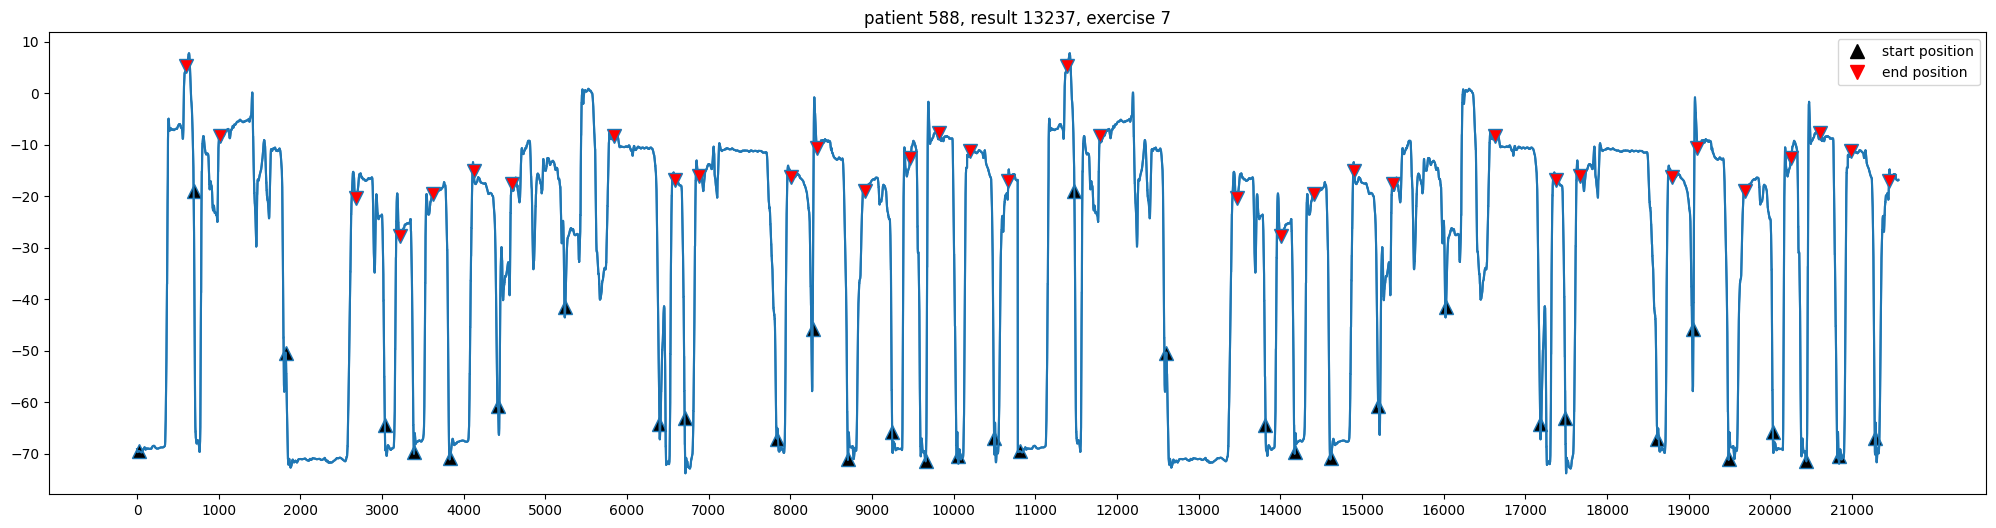

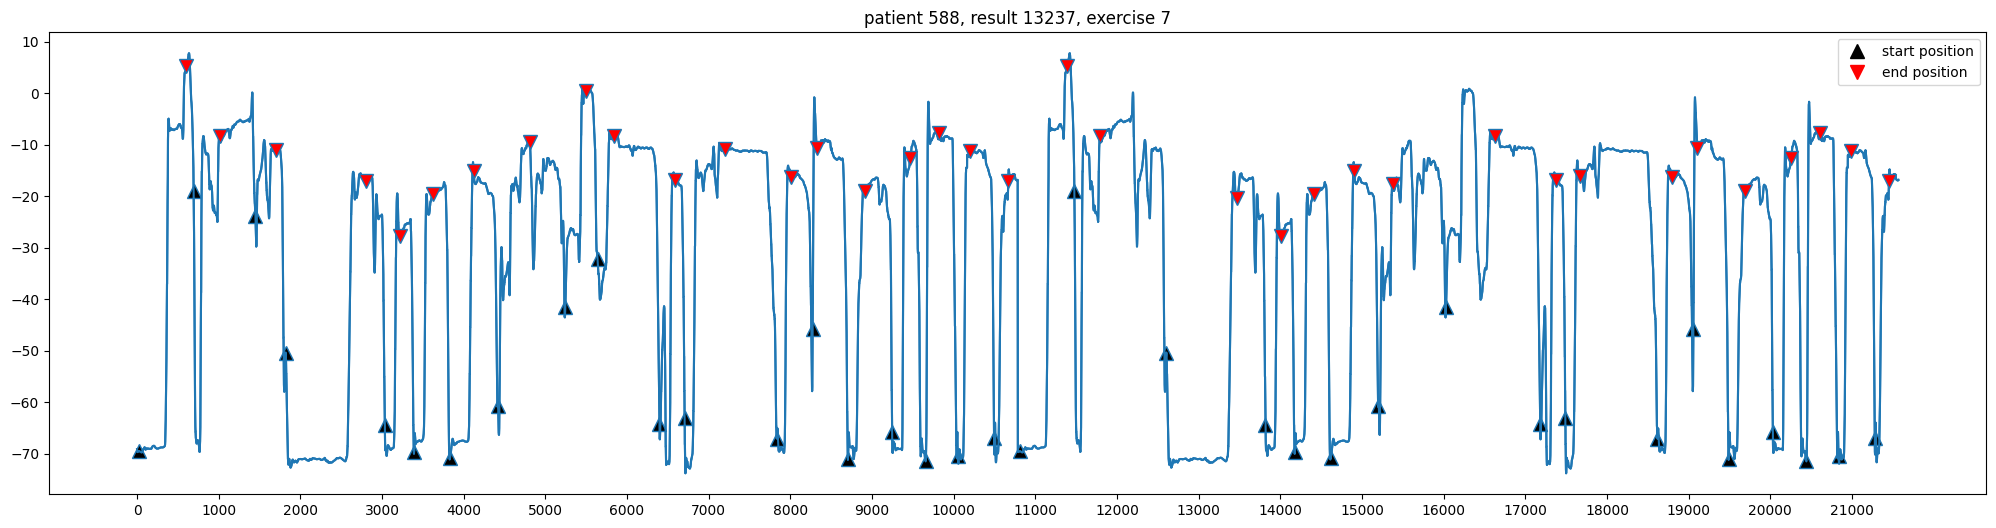

<Figure size 640x480 with 0 Axes>

In [105]:
plot_game_result(13237, 588) 

In [131]:
def plot_game_result(result_id, patient_id, frame_range=(0,-1)):
    defprops = {
        'xdata': [],
        'ydata': [],
        'linestyle': 'None',
        'markersize': 10
    }
    black_arrow = mlines.Line2D(
        **defprops,
        marker='^',
        color='black',
        label='start position',
    )
    red_arrow = mlines.Line2D(
        **defprops,
        marker='v',
        color='red',
        label='end position',
    )
    plt.legend(handles=[black_arrow, red_arrow])

    result_df = df.loc[df['game_result_id'] == result_id].reset_index(drop=True)
    
    assert len(exercise_ids := result_df['exercise_id'].unique()) == 1

    exercise_id = exercise_ids[0]


    # 'ArrowDown' positionType = 1;
    start_mark_locs = result_df.loc[result_df['position_type'] == 1].index
    # 'ArrowUp' positionType = 2;
    end_mark_locs = result_df.loc[result_df['position_type'] == 2].index    
    if frame_range:
        
        start_mark_locs = [i - frame_range[0] for i in start_mark_locs]
        #start_mark_locs = remove_marker_by_index(start_mark_locs, 2)
        end_mark_locs = [i - frame_range[0] for i in end_mark_locs]
        #end_mark_locs = remove_marker_by_index(end_mark_locs, 10)
    result_df['forearm_y_ang'].plot(
        title= f'patient {patient_id}, result {result_id}, exercise {exercise_id}',
        figsize=(25, 6),
        color='tab:blue',
        marker='^',
        markersize=10,
        markerfacecolor='black',
        markevery=start_mark_locs,
    )
    ax = result_df['forearm_y_ang'].plot(
        figsize=(25, 6),
        color='tab:blue',
        marker='v',
        markersize=10,
        markerfacecolor='red',
        markevery=end_mark_locs,

    )


    #start_mark_locs = add_sorted_marker_position(start_mark_locs, 650)
    tick_range_x = range(0, 4000, 100)
    plt.xticks(tick_range_x)
    new_figure=True
    if new_figure:
        plt.figure()


    defprops = {
        'xdata': [],
        'ydata': [],
        'linestyle': 'None',
        'markersize': 10
    }
    black_arrow = mlines.Line2D(
        **defprops,
        marker='^',
        color='black',
        label='start position',
    )
    red_arrow = mlines.Line2D(
        **defprops,
        marker='v',
        color='red',
        label='end position',
    )
    plt.legend(handles=[black_arrow, red_arrow])

    result_df = df.loc[df['game_result_id'] == result_id].reset_index(drop=True)
    
    assert len(exercise_ids := result_df['exercise_id'].unique()) == 1

    exercise_id = exercise_ids[0]


    # 'ArrowDown' positionType = 1;
    start_mark_locs = result_df.loc[result_df['position_type'] == 1].index
    # 'ArrowUp' positionType = 2;
    end_mark_locs = result_df.loc[result_df['position_type'] == 2].index    
    if frame_range:
        
        start_mark_locs = [i - frame_range[0] for i in start_mark_locs]
        #start_mark_locs = remove_marker_by_index(start_mark_locs, 2)
        end_mark_locs = [i - frame_range[0] for i in end_mark_locs]
        #end_mark_locs = remove_marker_by_index(end_mark_locs, 10)
    result_df['forearm_y_ang'].plot(
        title= f'patient {patient_id}, result {result_id}, exercise {exercise_id}',
        figsize=(25, 6),
        color='tab:blue',
        marker='^',
        markersize=10,
        markerfacecolor='black',
        markevery=start_mark_locs,
    )
    ax = result_df['forearm_y_ang'].plot(
        figsize=(25, 6),
        color='tab:blue',
        marker='v',
        markersize=10,
        markerfacecolor='red',
        markevery=end_mark_locs,

    )


    start_mark_locs = add_sorted_marker_position(start_mark_locs, 1820)
    start_mark_locs = add_sorted_marker_position(start_mark_locs, 2710)
    

    end_mark_locs = add_sorted_marker_position(end_mark_locs, 1910)
    end_mark_locs = add_sorted_marker_position(end_mark_locs, 2820)
    tick_range_x = range(0, 4000, 100)
    plt.xticks(tick_range_x)
    plt.figure()

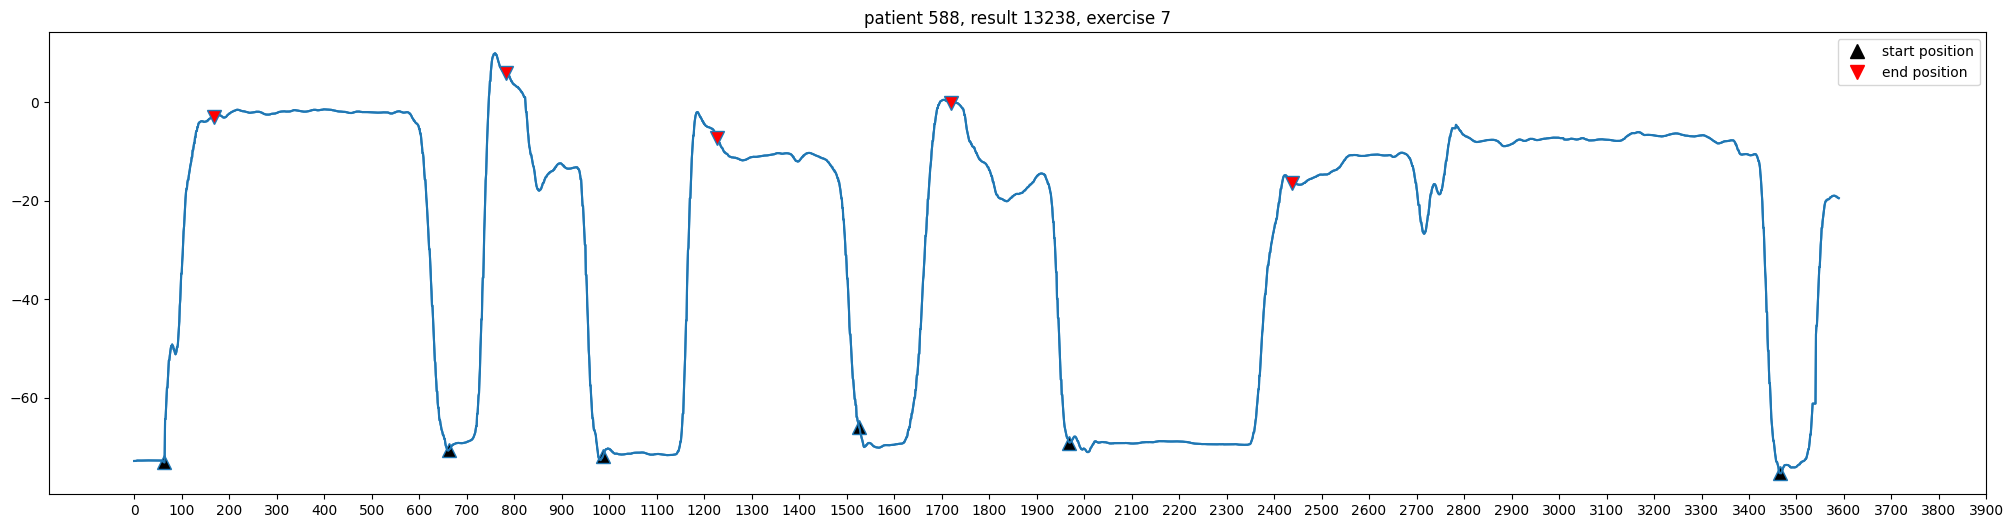

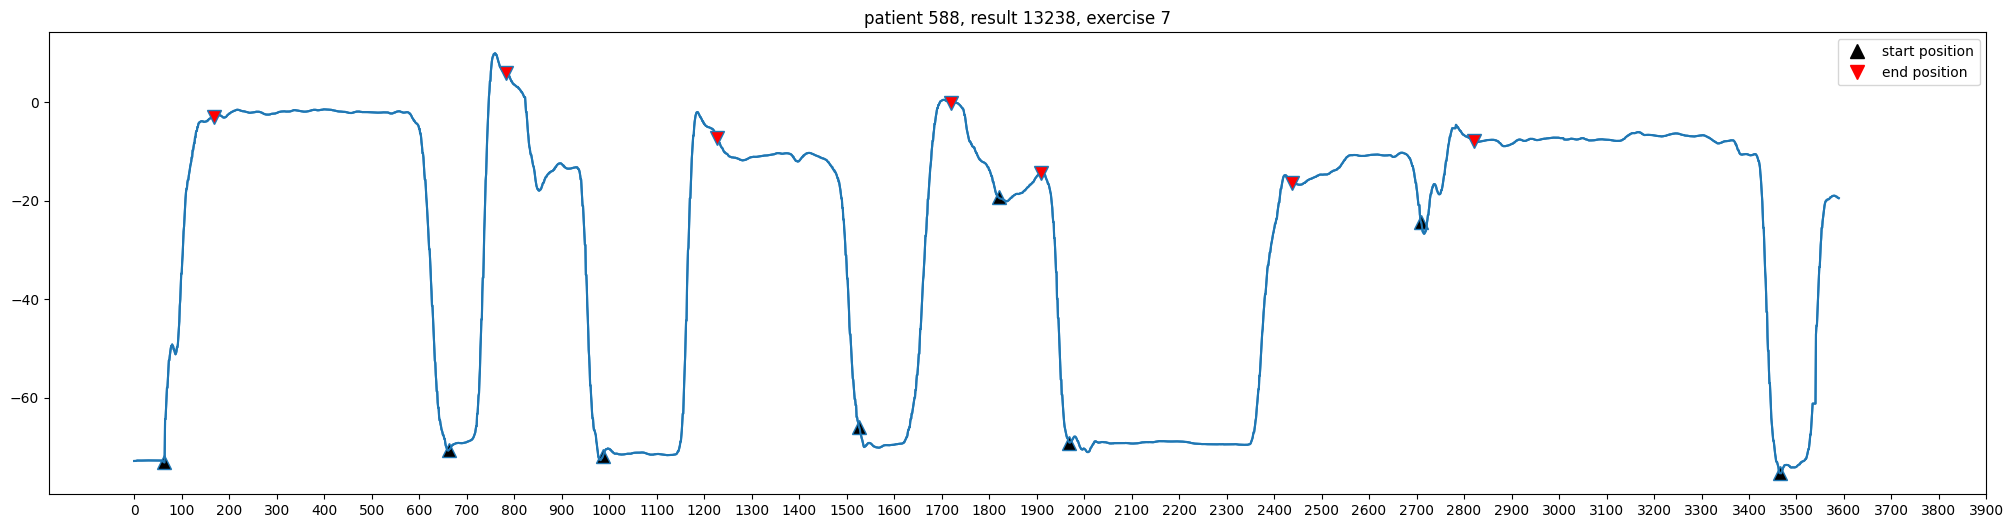

<Figure size 640x480 with 0 Axes>

In [132]:
plot_game_result(13238, 588) 